In [29]:
import pandas as pd

In [30]:
import numpy as np

In [31]:
import seaborn as sns

In [32]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [33]:
import sklearn

In [34]:
%%capture
pip install streamlit

In [35]:
import matplotlib.pyplot as plt

In [36]:
df1=pd.read_csv("Social_Network_Ads.csv")

In [37]:
import joblib

In [38]:
df=df1.copy()

In [39]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [40]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

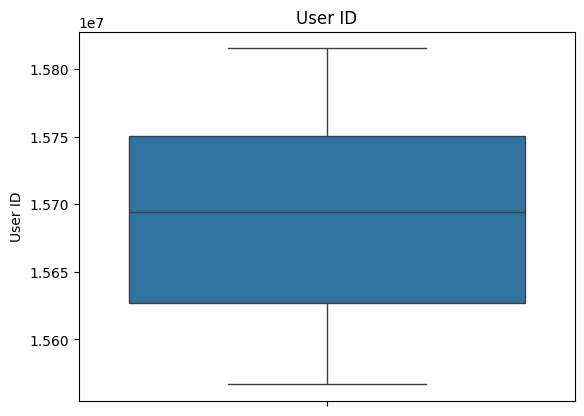

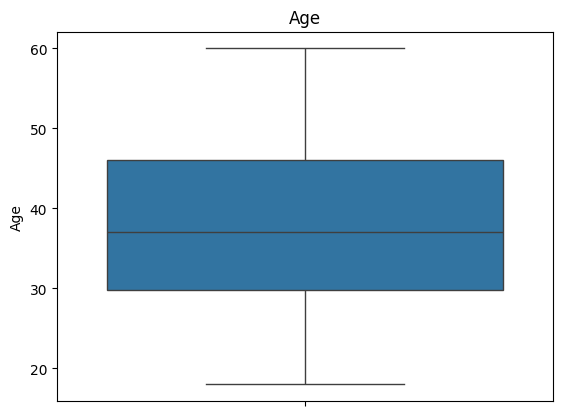

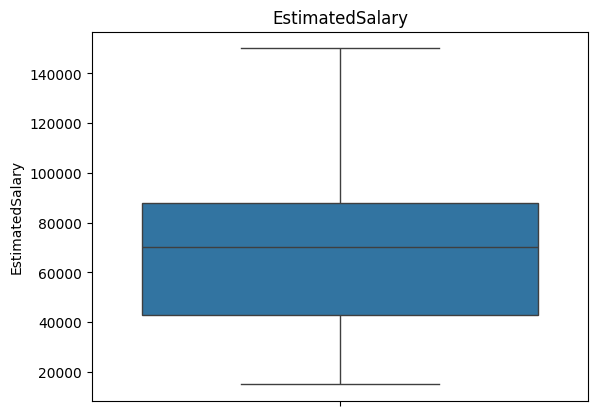

In [41]:
for i in ["User ID","Age","EstimatedSalary"]:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()


In [42]:

df["Gender"]=df["Gender"].map({"Male":0,"Female":1})

In [43]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [45]:
# logistic regression model
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()


In [51]:
# split the data into x,y
x=df.drop(columns="Purchased")
y=df["Purchased"]

In [48]:
x

,User ID,Gender,Age,EstimatedSalary
0,15624510,0,19,19000
1,15810944,0,35,20000
2,15668575,1,26,43000
3,15603246,1,27,57000
4,15804002,0,19,76000
...,...,...,...,...
395,15691863,1,46,41000
396,15706071,0,51,23000
397,15654296,1,50,20000
398,15755018,0,36,33000


In [49]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [52]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [55]:
from  sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=47)

<Axes: >

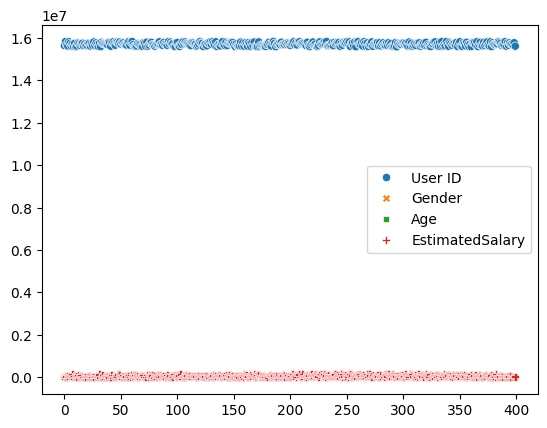

In [58]:
sns.scatterplot(x,color="red")

<Axes: ylabel='Purchased'>

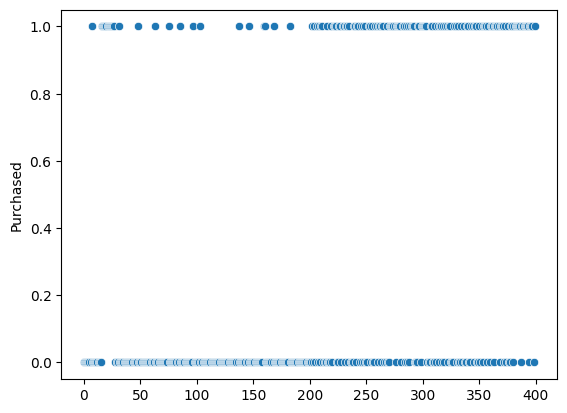

In [59]:
sns.scatterplot(y)

In [60]:
#future scalling formula=x-mue/sig
x_train_f=ss.fit_transform(x_train)
x_test_f=ss.transform(x_test)

In [61]:
x_test_f

array([[ 1.3227514 , -1.05131497, -0.70359982,  0.59693531],
       [ 1.25735497, -1.05131497,  1.58414219,  0.04156168],
       [-1.31085436,  0.95118973, -0.60827724, -0.0168987 ],
       [ 0.96641733,  0.95118973,  0.15430343, -0.27997043],
       [ 1.75734791, -1.05131497, -0.98956757, -1.41994788],
       [ 1.72380084,  0.95118973, -0.13166432,  0.18771263],
       [ 1.66644393,  0.95118973,  2.0607551 , -1.15687616],
       [ 1.50966648, -1.05131497, -0.13166432,  1.44461086],
       [ 0.56150948, -1.05131497, -0.98956757, -0.30920062],
       [ 0.37699362,  0.95118973,  0.63091635,  2.05844487],
       [ 0.12534155, -1.05131497, -0.7989224 ,  0.33386359],
       [-0.2455843 , -1.05131497,  0.82156152,  0.56770512],
       [ 1.16903261,  0.95118973,  1.4888196 ,  2.17536564],
       [-1.19868005, -1.05131497, -0.41763207, -0.74765349],
       [ 0.81860541,  0.95118973,  0.15430343,  0.3046334 ],
       [-0.04779553, -1.05131497,  1.77478735,  1.88306373],
       [-1.42770084,  0.

In [68]:
new_x_train=pd.DataFrame(x_train_f,columns=x.columns)

In [70]:
new_x_test=pd.DataFrame(x_test_f,columns=x.columns)

In [71]:
#new_x_train
# new_x_test
# y_train
# y_test

In [73]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [74]:
log

LogisticRegression()

In [75]:
log.fit(new_x_train,y_train)

LogisticRegression()

In [76]:
y_prd=log.predict(new_x_test)
y_prd

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [77]:
y_prd

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [79]:
joblib.dump(log,"social.pkl")

['social.pkl']

In [80]:
%%capture
pip install mysql-connector-python

In [83]:
import mysql.connector
import mysql.connector
def connect_to_db():
    return mysql.connector.connect(
        host="127.0.0.1",
        user="root",  # Change this
        password="Raja@3182",  # Change this
        database="social_meadia"
    )